# Launch Turi Create

In [21]:
import turicreate as tc

In [26]:
sales = tc.SFrame('home_data.sframe/')

In [27]:
sales

Columns:
	id	str
	date	datetime
	price	float
	bedrooms	float
	bathrooms	float
	sqft_living	float
	sqft_lot	float
	floors	float
	waterfront	int
	view	int
	condition	int
	grade	float
	sqft_above	float
	sqft_basement	float
	yr_built	float
	yr_renovated	float
	zipcode	str
	lat	float
	long	float
	sqft_living15	float
	sqft_lot15	float

Rows: 21613

Data:
+------------+---------------------------+-----------+----------+-----------+
|     id     |            date           |   price   | bedrooms | bathrooms |
+------------+---------------------------+-----------+----------+-----------+
| 7129300520 | 2014-10-13 00:00:00+00:00 |  221900.0 |   3.0    |    1.0    |
| 6414100192 | 2014-12-09 00:00:00+00:00 |  538000.0 |   3.0    |    2.25   |
| 5631500400 | 2015-02-25 00:00:00+00:00 |  180000.0 |   2.0    |    1.0    |
| 2487200875 | 2014-12-09 00:00:00+00:00 |  604000.0 |   4.0    |    3.0    |
| 1954400510 | 2015-02-18 00:00:00+00:00 |  510000.0 |   3.0    |    2.0    |
| 7237550310 | 2014-05-12 00:00:00+00:00 | 1225000.0 |   4.0    |    4.5    |
| 1321400060 | 2014-06-27 00:00:00+00:00 |  257500.0 |   3.0    |    2.25   |
| 2008000270 | 2015-01-15 00:00:00+00:00 |  291850.0 |   3.0    |    1.5    |
| 2414600126 | 2015-04-15 00:00:00+00:00 |  229500.0 |   3.0    |    1.0    |
| 3793500160 | 2015-03-12 00:00:00+00:00 |  323000.0 |   3.0    |    2.5    |
+------------+---------------------------+-----------+----------+-----------+
+-------------+----------+--------+------------+------+-----------+-------+
| sqft_living | sqft_lot | floors | waterfront | view | condition | grade |
+-------------+----------+--------+------------+------+-----------+-------+
|    1180.0   |  5650.0  |  1.0   |     0      |  0   |     3     |  7.0  |
|    2570.0   |  7242.0  |  2.0   |     0      |  0   |     3     |  7.0  |
|    770.0    | 10000.0  |  1.0   |     0      |  0   |     3     |  6.0  |
|    1960.0   |  5000.0  |  1.0   |     0      |  0   |     5     |  7.0  |
|    1680.0   |  8080.0  |  1.0   |     0      |  0   |     3     |  8.0  |
|    5420.0   | 101930.0 |  1.0   |     0      |  0   |     3     |  11.0 |
|    1715.0   |  6819.0  |  2.0   |     0      |  0   |     3     |  7.0  |
|    1060.0   |  9711.0  |  1.0   |     0      |  0   |     3     |  7.0  |
|    1780.0   |  7470.0  |  1.0   |     0      |  0   |     3     |  7.0  |
|    1890.0   |  6560.0  |  2.0   |     0      |  0   |     3     |  7.0  |
+-------------+----------+--------+------------+------+-----------+-------+
+------------+---------------+----------+--------------+---------+-------------+
| sqft_above | sqft_basement | yr_built | yr_renovated | zipcode |     lat     |
+------------+---------------+----------+--------------+---------+-------------+
|   1180.0   |      0.0      |  1955.0  |     0.0      |  98178  | 47.51123398 |
|   2170.0   |     400.0     |  1951.0  |    1991.0    |  98125  | 47.72102274 |
|   770.0    |      0.0      |  1933.0  |     0.0      |  98028  | 47.73792661 |
|   1050.0   |     910.0     |  1965.0  |     0.0      |  98136  |   47.52082  |
|   1680.0   |      0.0      |  1987.0  |     0.0      |  98074  | 47.61681228 |
|   3890.0   |     1530.0    |  2001.0  |     0.0      |  98053  | 47.65611835 |
|   1715.0   |      0.0      |  1995.0  |     0.0      |  98003  | 47.30972002 |
|   1060.0   |      0.0      |  1963.0  |     0.0      |  98198  | 47.40949984 |
|   1050.0   |     730.0     |  1960.0  |     0.0      |  98146  | 47.51229381 |
|   1890.0   |      0.0      |  2003.0  |     0.0      |  98038  | 47.36840673 |
+------------+---------------+----------+--------------+---------+-------------+
+---------------+---------------+-----+
|      long     | sqft_living15 | ... |
+---------------+---------------+-----+
| -122.25677536 |     1340.0    | ... |
|  -122.3188624 |     1690.0    | ... |
| -122.23319601 |     2720.0    | ... |
| -122.39318505 |     1360.0    | ... |
| -122.04490059 |     1800.0    | ... |
| -122.00528655 |     4760.0    | ... |

In [32]:
import seaborn as sns

<AxesSubplot:>

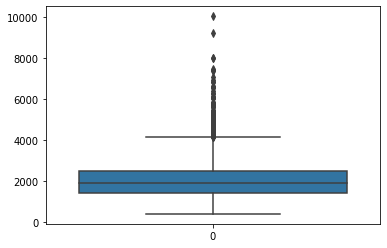

In [38]:
sns.boxplot(data = sales[1:5000]['sqft_living'])

In [39]:
import numpy as np

In [44]:
np.quantile(sales[1:5000]['sqft_living'], 0.75 )

2500.0

In [50]:
print(2500 + 1.5*(2500 - 1410))

4135.0


In [51]:
tc.show(sales[1:5000]['sqft_living'], sales[1:5000]['price'])

Materializing X axis SArray

Materializing Y axis SArray

In [52]:
training_set, test_set = sales.random_split(0.8, seed=0)

In [58]:
sales_model_sqftliv = tc.linear_regression.create(training_set, target='price', features= ['sqft_living']) 

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Linear regression:

--------------------------------------------------------

Number of examples          : 16514

Number of features          : 1

Number of unpacked features : 1

Number of coefficients    : 2

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

| Iteration | Passes   | Elapsed Time | Training Max Error | Validation Max Error | Training Root-Mean-Square Error | Validation Root-Mean-Square Error |

+-----------+----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

| 1         | 2        | 0.015786     | 4349029.242442     | 1430229.607224       | 263954.584973                   | 242957.543464                     |

+-----------+----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

SUCCESS: Optimal solution found.

In [59]:
test_set

Columns:
	id	str
	date	datetime
	price	float
	bedrooms	float
	bathrooms	float
	sqft_living	float
	sqft_lot	float
	floors	float
	waterfront	int
	view	int
	condition	int
	grade	float
	sqft_above	float
	sqft_basement	float
	yr_built	float
	yr_renovated	float
	zipcode	str
	lat	float
	long	float
	sqft_living15	float
	sqft_lot15	float

Rows: 4229

Data:
+------------+---------------------------+----------+----------+-----------+
|     id     |            date           |  price   | bedrooms | bathrooms |
+------------+---------------------------+----------+----------+-----------+
| 0114101516 | 2014-05-28 00:00:00+00:00 | 310000.0 |   3.0    |    1.0    |
| 9297300055 | 2015-01-24 00:00:00+00:00 | 650000.0 |   4.0    |    3.0    |
| 1202000200 | 2014-11-03 00:00:00+00:00 | 233000.0 |   3.0    |    2.0    |
| 8562750320 | 2014-11-10 00:00:00+00:00 | 580500.0 |   3.0    |    2.5    |
| 7589200193 | 2014-11-10 00:00:00+00:00 | 535000.0 |   3.0    |    1.0    |
| 2078500320 | 2014-06-20 00:00:00+00:00 | 605000.0 |   4.0    |    2.5    |
| 7766200013 | 2014-08-11 00:00:00+00:00 | 775000.0 |   4.0    |    2.25   |
| 9478500640 | 2014-08-19 00:00:00+00:00 | 292500.0 |   4.0    |    2.5    |
| 9558200045 | 2014-08-28 00:00:00+00:00 | 289000.0 |   3.0    |    1.75   |
| 8820901275 | 2014-06-10 00:00:00+00:00 | 571000.0 |   4.0    |    2.0    |
+------------+---------------------------+----------+----------+-----------+
+-------------+----------+--------+------------+------+-----------+-------+
| sqft_living | sqft_lot | floors | waterfront | view | condition | grade |
+-------------+----------+--------+------------+------+-----------+-------+
|    1430.0   | 19901.0  |  1.5   |     0      |  0   |     4     |  7.0  |
|    2950.0   |  5000.0  |  2.0   |     0      |  3   |     3     |  9.0  |
|    1710.0   |  4697.0  |  1.5   |     0      |  0   |     5     |  6.0  |
|    2320.0   |  3980.0  |  2.0   |     0      |  0   |     3     |  8.0  |
|    1090.0   |  3000.0  |  1.5   |     0      |  0   |     4     |  8.0  |
|    2620.0   |  7553.0  |  2.0   |     0      |  0   |     3     |  8.0  |
|    4220.0   | 24186.0  |  1.0   |     0      |  0   |     3     |  8.0  |
|    2250.0   |  4495.0  |  2.0   |     0      |  0   |     3     |  7.0  |
|    1260.0   |  8400.0  |  1.0   |     0      |  0   |     3     |  7.0  |
|    2750.0   |  7807.0  |  1.5   |     0      |  0   |     5     |  7.0  |
+-------------+----------+--------+------------+------+-----------+-------+
+------------+---------------+----------+--------------+---------+-------------+
| sqft_above | sqft_basement | yr_built | yr_renovated | zipcode |     lat     |
+------------+---------------+----------+--------------+---------+-------------+
|   1430.0   |      0.0      |  1927.0  |     0.0      |  98028  | 47.75584254 |
|   1980.0   |     970.0     |  1979.0  |     0.0      |  98126  | 47.57136955 |
|   1710.0   |      0.0      |  1941.0  |     0.0      |  98002  | 47.30482931 |
|   2320.0   |      0.0      |  2003.0  |     0.0      |  98027  |  47.5391103 |
|   1090.0   |      0.0      |  1929.0  |     0.0      |  98117  | 47.68889559 |
|   2620.0   |      0.0      |  1996.0  |     0.0      |  98056  | 47.53013988 |
|   2600.0   |     1620.0    |  1984.0  |     0.0      |  98166  | 47.44504345 |
|   2250.0   |      0.0      |  2008.0  |     0.0      |  98042  | 47.36628767 |
|   1260.0   |      0.0      |  1954.0  |     0.0      |  98148  | 47.43658598 |
|   2250.0   |     500.0     |  1916.0  |     0.0      |  98125  |  47.7168015 |
+------------+---------------+----------+--------------+---------+-------------+
+---------------+---------------+-----+
|      long     | sqft_living15 | ... |
+---------------+---------------+-----+
| -122.22874498 |     1780.0    | ... |
| -122.37541218 |     2140.0    | ... |
| -122.21774909 |     1030.0    | ... |
| -122.06971484 |     2580.0    | ... |
|  -122.3752359 |     1570.0    | ... |
| -122.18000831 |     2620.0    | ... |
| -122.3472087

In [65]:
sales_model_sqftliv.evaluate(test_set)

{'max_error': 4143178.32386549, 'rmse': 255193.2334862225}

In [68]:
predicted = sales_model_sqftliv.predict(test_set)

In [69]:
actual = test_set['price']

In [70]:
type(predicted)

turicreate.data_structures.sarray.SArray

In [78]:
sum((actual - predicted)**2)

275407646958142.53

In [75]:
test_set.num_rows()

4229

In [79]:
print(1.1823126034523528020808701820761e-4 * 275407646958142)

32561793208.576733


In [80]:
import matplotlib.pyplot as plt
%matplotlib inline

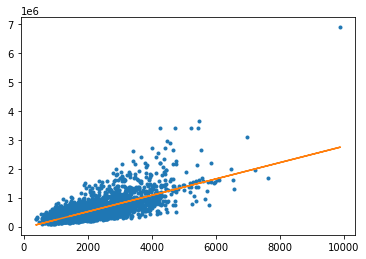

In [90]:
plt.plot(test_set['sqft_living'], test_set['price'], '.',test_set['sqft_living'], sales_model_sqftliv.predict(test_set),'-' )

In [92]:
sales_model_sqftliv.coefficients

Columns:
	name	str
	index	str
	value	float
	stderr	float

Rows: 2

Data:
+-------------+-------+--------------------+--------------------+
|     name    | index |       value        |       stderr       |
+-------------+-------+--------------------+--------------------+
| (intercept) |  None | -47291.47908876825 | 5056.322341863313  |
| sqft_living |  None | 282.01346362217174 | 2.2202041743621517 |
+-------------+-------+--------------------+--------------------+
[2 rows x 4 columns]